# Analisis de resultados del WebScraping.

### Librerias:

In [85]:
from .. import Keys

ImportError: attempted relative import with no known parent package

In [42]:
import os
import re
import nltk #procesamiento de lenguaje natural
import openai
import folium
import unidecode
import numpy as np
import pandas as pd
#from Keys import Keys
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from unidecode import unidecode
from nltk.corpus import stopwords
from geopy.geocoders import GoogleV3
from nltk.tokenize import word_tokenize #Separa la frase en "Tokens"
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to /home/cscc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cscc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/cscc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Carga de archivos

Se cargan los dataframes diferentes y se unen para visualizar su contenido, realizar modificaciones necesarias y proceder a agruparlos una vez validemos que estan bien sus datos y estructura.

In [43]:
# Directorio que contiene los archivos CSV
directorio = "../media/Resultados/"

#Se excluirá el df_final
archivo_excluido = "../media/Resultados/df_final.csv"

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Itera a través de los archivos en el directorio
for filename in os.listdir(directorio):
    if filename.endswith(".csv") and filename != archivo_excluido:
        # Lee el archivo CSV y conviértelo en un DataFrame
        path = os.path.join(directorio, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

# Combina los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

In [46]:
df_Categorias = pd.read_csv("../media/categorias.csv") # Se cargan el dataframe con las categorias establecidas.

### Visualizar archivos

visualizamos su contenido y estructura para conocer más de cerca cada uno de los archivos

In [65]:
df

title  \
0     aprendiz universitario en ingenieria de sistem...   
1     aprendiz universitario en ingenieria de softwa...   
2     aprendiz universitario en ingenieria de sistem...   
3     aprendiz universitario en ingenieria de sistem...   
4     aprendiz universitario en ingenieria de sistem...   
...                                                 ...   
6445  analista de aplicaciones y monitoreo  informatica   
6446                        tecnico de soporte  computo   
6447                              disenador web grafico   
6448                     junior java developer  vizcaya   
6449        asistente de sistema  tulua valle del cauca   

                                 location                 company  latitud  \
0                                colombia             bancolombia      NaN   
1                                colombia             bancolombia      NaN   
2                                colombia             bancolombia      NaN   
3                                colombia             bancolombia      NaN   
4                                colombia             bancolombia      NaN   
...                                   ...                     ...      ...   
6445       girardot cundinamarca colombia              soporte sa      NaN   
6446  bogota dc capital district colombia  tecnologia informatica      NaN   
6447  bogota dc capital district colombia                  ada sa      NaN   
6448                   antioquia colombia                  teknei      NaN   
6449       tulua valle del cauca colombia         magneto empleos      NaN   

      longitud  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
6445       NaN  
6446       NaN  
6447       NaN  
6448       NaN  
6449       NaN  

[6450 rows x 5 columns]

### Duplicados

In [66]:
df.drop_duplicates()

title  \
0     aprendiz universitario en ingenieria de sistem...   
1     aprendiz universitario en ingenieria de softwa...   
3     aprendiz universitario en ingenieria de sistem...   
4     aprendiz universitario en ingenieria de sistem...   
6     aprendiz universitario en ingenieria de sistem...   
...                                                 ...   
6230                            practicante de sistemas   
6306                                ingenieroa de datos   
6335               analista de soluciones empresariales   
6406                                ingenieroa de datos   
6435               analista de soluciones empresariales   

                       location                 company   latitud   longitud  
0                      colombia             bancolombia       NaN        NaN  
1                      colombia             bancolombia       NaN        NaN  
3                      colombia             bancolombia       NaN        NaN  
4                      colombia             bancolombia       NaN        NaN  
6                      colombia             bancolombia       NaN        NaN  
...                         ...                     ...       ...        ...  
6230   giron santander colombia               metalteco  7.080334 -73.171039  
6306  capital district colombia  ntt data europe  latam  4.710989 -74.072092  
6335                   colombia            lpa colombia  4.570868 -74.297333  
6406  capital district colombia  ntt data europe  latam       NaN        NaN  
6435                   colombia            lpa colombia       NaN        NaN  

[617 rows x 5 columns]

### Nulos

Validamos si poseen datos nulos en cada uno de los dataframe

In [67]:
df.isnull().sum()

title          0
location       0
company        0
latitud     3400
longitud    3400
dtype: int64

### Transformaciones:

In [68]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x) # Se pasa todo el df a minuscula
df_Categorias = df_Categorias.map(lambda x: x.lower() if isinstance(x, str) else x) # Se pasa todo el df a minuscula

In [69]:
# Función para aplicar limpieza a cada celda del DataFrame
def limpiar_celda(celda):
    if isinstance(celda, str):
        # Eliminar caracteres que no sean letras o espacios en blanco
        celda = re.sub(r'[^\w\s]', '', celda)
        # Eliminar números
        celda = re.sub(r'\d+', '', celda)
        # Remover acentos y caracteres especiales
        celda = unidecode(celda)
    return celda

In [70]:
# Se aplicar limpieza a cada celda del DataFrame
df = df.applymap(limpiar_celda)
df_Categorias = df_Categorias.applymap(limpiar_celda)

/tmp/ipykernel_16718/735895558.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(limpiar_celda)
/tmp/ipykernel_16718/735895558.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_Categorias = df_Categorias.applymap(limpiar_celda)


In [71]:
df

title  \
0     aprendiz universitario en ingenieria de sistem...   
1     aprendiz universitario en ingenieria de softwa...   
2     aprendiz universitario en ingenieria de sistem...   
3     aprendiz universitario en ingenieria de sistem...   
4     aprendiz universitario en ingenieria de sistem...   
...                                                 ...   
6445  analista de aplicaciones y monitoreo  informatica   
6446                        tecnico de soporte  computo   
6447                              disenador web grafico   
6448                     junior java developer  vizcaya   
6449        asistente de sistema  tulua valle del cauca   

                                 location                 company  latitud  \
0                                colombia             bancolombia      NaN   
1                                colombia             bancolombia      NaN   
2                                colombia             bancolombia      NaN   
3                                colombia             bancolombia      NaN   
4                                colombia             bancolombia      NaN   
...                                   ...                     ...      ...   
6445       girardot cundinamarca colombia              soporte sa      NaN   
6446  bogota dc capital district colombia  tecnologia informatica      NaN   
6447  bogota dc capital district colombia                  ada sa      NaN   
6448                   antioquia colombia                  teknei      NaN   
6449       tulua valle del cauca colombia         magneto empleos      NaN   

      longitud  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
6445       NaN  
6446       NaN  
6447       NaN  
6448       NaN  
6449       NaN  

[6450 rows x 5 columns]

- Agrupar por titulos

In [72]:
df_por_ubicación = df.groupby('location')['title'].nunique().reset_index()

In [73]:
print(df_por_ubicación)

                               location  title
0                    antioquia colombia      1
1            barbosa antioquia colombia      1
2       barranquilla atlantico colombia     11
3              bello antioquia colombia      2
4   bogota dc capital district colombia    129
..                                  ...    ...
59        valparaiso antioquia colombia      1
60                     vichada colombia      1
61          villavicencio meta colombia      2
62              yopal casanare colombia      1
63       yumbo valle del cauca colombia      2

[64 rows x 2 columns]


In [74]:
top_5_ubicacion = df_por_ubicación.sort_values('title', ascending=False).head(5)

In [75]:
print(top_5_ubicacion)

                               location  title
4   bogota dc capital district colombia    129
30          medellin antioquia colombia     53
11                             colombia     42
6         cali valle del cauca colombia     20
2       barranquilla atlantico colombia     11


- Visualización: Grafico de barras de las 5 ubicaciones con más demandas de puestos

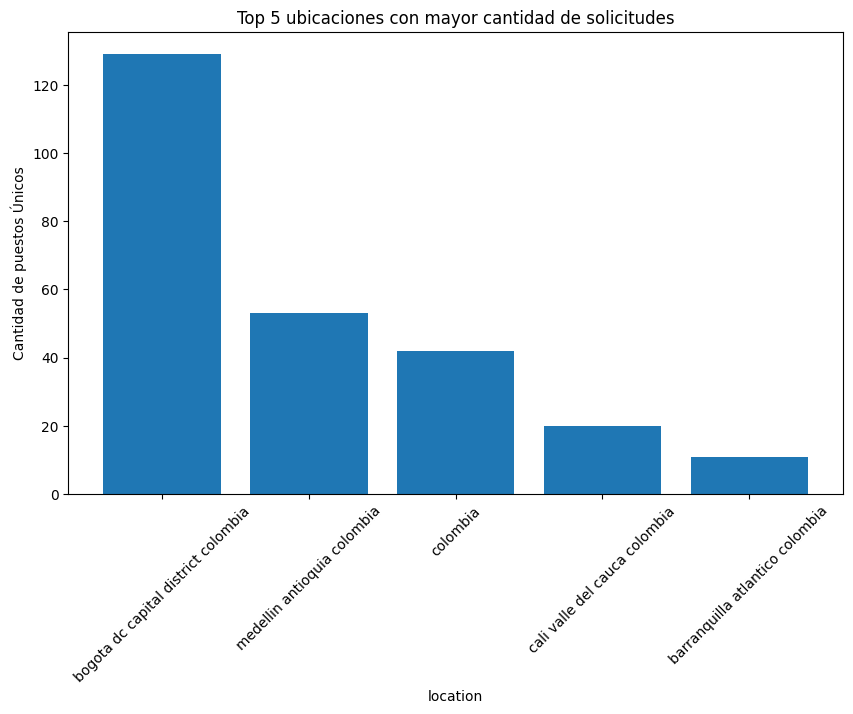

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_ubicacion['location'], top_5_ubicacion['title'])
plt.xlabel('location')
plt.ylabel('Cantidad de puestos Únicos')
plt.title('Top 5 ubicaciones con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

- Agrupar por empresas

In [77]:
df_por_empresas = df.groupby('company')['title'].nunique().reset_index()
#df_por_empresas_computrabajo = df_computrabajo.groupby('location')['company'].nunique().reset_index()
#df_por_empresas_jobz = df_jobz.groupby('location')['company'].nunique().reset_index()

In [78]:
print(df_por_empresas)

                              company  title
0                         abcw global      1
1                  accenture colombia      2
2                  acierta headhunter      4
3                              ada sa      9
4                           agaval sa      1
..                                ...    ...
149   universidad catolica de oriente      1
150                            velaio      1
151  wfm informatica y tecnologia sas      2
152              world food programme      1
153                           xxxxxxx      1

[154 rows x 2 columns]


In [79]:
top_5_empresas = df_por_empresas.sort_values('title', ascending=False).head(5)

In [80]:
print(top_5_empresas)

                       company  title
18                 bancolombia     22
141     tecnologia informatica     17
49                  eglobal sa     16
3                       ada sa      9
14   banco agrario de colombia      8


- Presentación

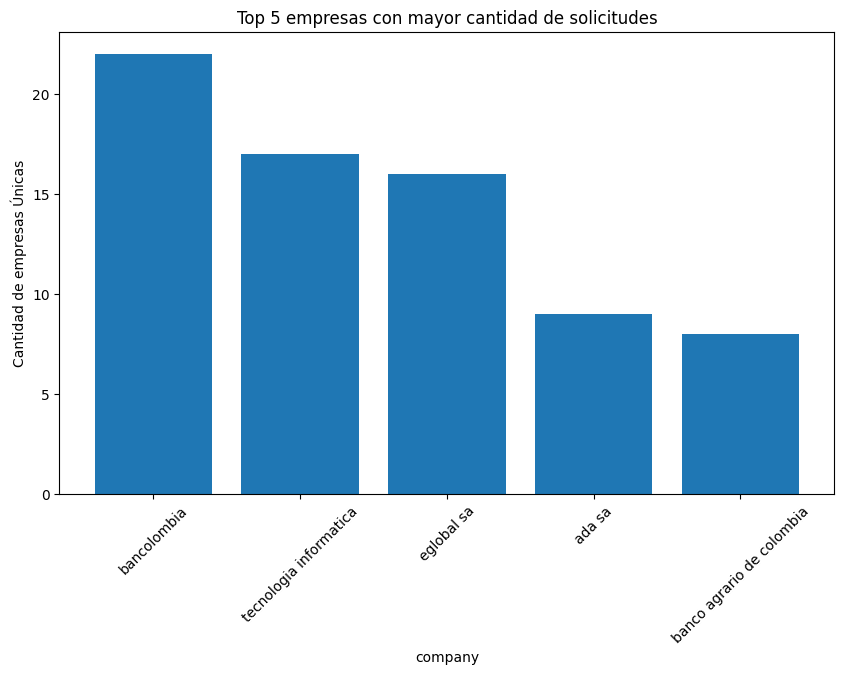

In [81]:
# Grafico de barras de las 5 empresas más demandantes
plt.figure(figsize=(10, 6))
plt.bar(top_5_empresas['company'], top_5_empresas['title'])
plt.xlabel('company')
plt.ylabel('Cantidad de empresas Únicas')
plt.title('Top 5 empresas con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

- Mapa

In [82]:
# Inicializa el objeto geocoder de Google Maps
geolocator = GoogleV3(api_key=Keys.google_api_key)

def obtener_latitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.latitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None
    
def obtener_longitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None

NameError: name 'Keys' is not defined

In [ ]:
top_5_ubicacion

location  title
4   bogota dc capital district colombia    106
26          medellin antioquia colombia     39
11                             colombia     34
6         cali valle del cauca colombia     15
2       barranquilla atlantico colombia     11

In [ ]:
df['latitud'] = df['location'].apply(obtener_latitud)
df['longitud'] = df['location'].apply(obtener_longitud)

In [ ]:
#Se crea un mapa centrado en la capital
mapa = folium.Map(location=[4.710989, -74.072092], zoom_start=5.5)

# Resaltar las 5 ciudades principales en el mapa
for _, row in df.iterrows():
    ciudad = row['location']
    latitud = row['latitud']
    longitud = row['longitud']
    if ciudad in list(top_5_ubicacion['location']):
        colores='lightblue'
    else:  
        colores='black'
    folium.Marker(
        location=[latitud, longitud],
        popup=ciudad,
        icon=folium.Icon(icon='home', color=colores)
    ).add_to(mapa)

#Imprimir mapa
mapa

### Categorias

In [ ]:
#Se lee el df generado a partir del analisis del WebScraping, se toman de este solo los titulos y se conserva el formato Dataframe
df_Titles = df["title"].to_frame()

In [ ]:
# assigning API KEY to initialize openai environment
openai.api_key = Keys.openai_api_key

In [ ]:
response = openai.ChatCompletion.create(
  model="gpt-4-0613",
  messages=[
        {"role": "system", "content": "Hello"},
       {"role": "user", "content": f"""
        Te proporcionaré un dataframe: {df_Titles}, el cual contiene titulos de trabajos obtenidos mediante un proceso de WebScraping y un dataframe: {df_Categorias} con unas categorias potenciales basadas en los títulos de los trabajos obtenidos; tu trabajo será el de generar un JSON con clave (la categoria) y el valor deberá corresponder a la cantidad de titulos identificados y clasificados por ti para cada una de las categorias. solo responde con el JSON, NADA MAS."""}
    ]
)

#print(response['choices'][0]['message']['content'])

### Categorización de titulos

In [ ]:
df_str = df_Titles.to_string(index = False)

In [ ]:
df_str

'                                                                                                                                  title\n                                               aprendiz universitario en ingenieria de sistemas ingenieria informatica carreras afines \n                                              aprendiz universitario en ingenieria de software ingenieria en analitica de datos afines \n                                               aprendiz universitario en ingenieria de sistemas ingenieria informatica carreras afines \n                                               aprendiz universitario en ingenieria de sistemas ingenieria de procesos carreras afines \n                                                        aprendiz universitario en ingenieria de sistemas ingenieria informatica afines \n                                               aprendiz universitario en ingenieria de sistemas ingenieria informatica carreras afines \n                                        

In [ ]:
#Tokenizar (separar cada parte del archivo y crear una lista con cada sector.)
token=word_tokenize(df_str)
token

['title',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'software',
 'ingenieria',
 'en',
 'analitica',
 'de',
 'datos',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'de',
 'procesos',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'de',
 'software',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 '

#### Stop words

In [ ]:
a=set(stopwords.words("spanish"))

stopwords=[x for x in token if x not in a]

In [ ]:
stopwords

['title',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'software',
 'ingenieria',
 'analitica',
 'datos',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'procesos',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'software',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',

In [ ]:
#Encontrar la frecuencia de valores en un nombre_archivoo
from nltk.probability import FreqDist
fdist = FreqDist(stopwords)
fdist

FreqDist({'ingenieria': 1115, 'sistemas': 851, 'analista': 628, 'aprendiz': 607, 'informatica': 588, 'universitario': 572, 'afines': 544, 'tecnologia': 527, 'carreras': 441, 'pasantia': 378, ...})

In [ ]:
fdist10 = fdist.most_common(10)
fdist10
#Crea una toppla con las palabras con mayor frecuencia

[('ingenieria', 1115),
 ('sistemas', 851),
 ('analista', 628),
 ('aprendiz', 607),
 ('informatica', 588),
 ('universitario', 572),
 ('afines', 544),
 ('tecnologia', 527),
 ('carreras', 441),
 ('pasantia', 378)]

In [ ]:
stopwords = re.sub(r'[^\w\s]','',str(stopwords))

In [ ]:
#te dice si es un verbo, sustantivo, pronombre
tex = word_tokenize(str(stopwords))
for token in tex:
  print(nltk.pos_tag([token]))

[('title', 'NN')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenieria', 'NNS')]
[('informatica', 'NN')]
[('carreras', 'NNS')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('software', 'NN')]
[('ingenieria', 'NNS')]
[('analitica', 'NN')]
[('datos', 'NN')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenieria', 'NNS')]
[('informatica', 'NN')]
[('carreras', 'NNS')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenieria', 'NNS')]
[('procesos', 'NN')]
[('carreras', 'NNS')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenieria', 'NNS')]
[('informatica', 'NN')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenier

### Descarga del dataframe final

In [ ]:
df.to_csv("media/Resultados/df_final.csv", index=False, mode="w")

### Nube

In [ ]:
# Convertir el FreqDist en un diccionario
dict_freq = dict(fdist)

# Obtener las claves (primera columna)
primera_columna = list(dict_freq.keys())
primera_columna.remove("title")
nube = str(primera_columna)

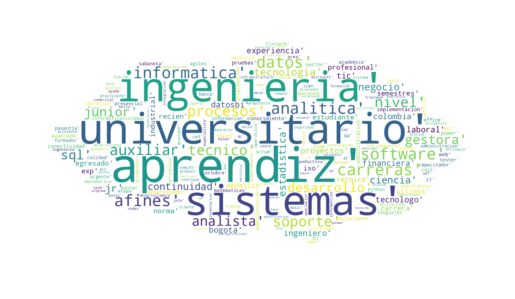

In [ ]:
from PIL import Image

# Cargar la imagen de la máscara
mask = np.array(Image.open("media/plantilla_nube.jpg"))

# Crear una instancia de WordCloud con la máscara
wc = WordCloud(mask=mask, background_color="white")

# Generar la nube de palabras a partir de tu texto (nube)
wc.generate(nube)

# Mostrar la nube de palabras
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()